In [16]:
import tensorflow as tf
from numpy import *
import  numpy as np
import matplotlib.pyplot as plt

tf.compat.v1.disable_v2_behavior()

data = mat([[0.697,0.460,1],
        [0.774,0.376,1],
        [0.634,0.264,1],
        [0.608,0.318,1],
        [0.556,0.215,1],
        [0.403,0.237,1],
        [0.481,0.149,1],
        [0.437,0.211,1],
        [0.666,0.091,0],
        [0.243,0.267,0],
        [0.245,0.057,0],
        [0.343,0.099,0],
        [0.639,0.161,0],
        [0.657,0.198,0],
        [0.360,0.370,0],
        [0.593,0.042,0],
        [0.719,0.103,0]])
dim = data.shape[1]-1
x_train=data[:,0:dim].astype(float32)
y_train=data[:,dim].astype(float32)
y_train = mat(y_train)
w=tf.Variable(tf.zeros([2,1]))
b=tf.Variable(tf.zeros([1,1]))
y=1/(1+tf.exp(-(tf.matmul(x_train,w)+b)))
loss = tf.reduce_mean(- y_train.reshape(-1, 1) * tf.math.log(y) - (1 - y_train.reshape(-1, 1)) * tf.math.log(1 - y))
train=tf.compat.v1.train.GradientDescentOptimizer(0.5).minimize(loss)
init=tf.compat.v1.global_variables_initializer()
sess=tf.compat.v1.Session()
sess.run(init)
for i in range(1000):
    sess.run(train)
print(i,sess.run(w).flatten(),sess.run(b).flatten())

999 [2.1667426 7.471089 ] [-2.8462222]


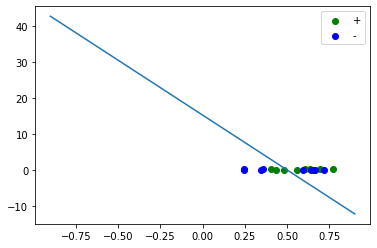

In [13]:
#画图
X0 = array(data[:8])#选择训练集中为好瓜的样本
X1 = array(data[8:])#选择训练集中为坏瓜的样本
ax = plt.subplot(111)
ax.scatter(X0[:,0],X0[:,1],c='g',label='+')#选择好瓜样本的第一列和第二列 画出散点图
ax.scatter(X1[:,0],X1[:,1],c='b',label='-')#选择坏瓜样本的第一列和第二列 画出散点图
x1 = arange(-0.9,1.0,0.1)
y1 = (-b-w[0]*x1)/w[1]
plt.sca(ax)
plt.plot(x1,sess.run(y1).flatten())
plt.legend()#设置图例
plt.show()